<a href="https://colab.research.google.com/github/abhishekbm1996/nirf-2022-statewise/blob/main/get_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
def extract_nirf(category):
    headers = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
    page = requests.get("https://www.nirfindia.org/2022/" + category + ".html", headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    table = soup.find('table', attrs={'id':'tbl_overall'})
    table_body = table.find('tbody')
    data = []
    rows = table_body.find_all('tr', recursive=False)
    for row in rows:
        cols = row.find_all('td', recursive=False)
        cols = [ele.contents[0] for ele in cols]
        # print([ele for ele in cols if ele.find_parents('td')])
        data.append([ele for ele in cols if (ele)]) # Get rid of empty values
    df_ranking = pd.DataFrame(data)
    df_ranking.columns= ['Institute ID', 'Name', 'City', 'State', 'Score', 'Rank']
    df_ranking.head(10)
    df_ranking.to_csv("nirf_data_extracted/nirf_2022_"+ category + "_ranking.csv",index=False)

In [ ]:
categories = ["OverallRanking", "UniversityRanking", "CollegeRanking", "ResearchRanking", "EngineeringRanking", "ManagementRanking", "PharmacyRanking", "MedicalRanking", "DentalRanking", "LawRanking", "ArchitectureRanking"]
for category in categories:
    extract_nirf(category)

In [ ]:
arch_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_ArchitectureRanking_ranking.csv")
college_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_CollegeRanking_ranking.csv")
dental_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_DentalRanking_ranking.csv")
engineering_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_EngineeringRanking_ranking.csv")
law_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_LawRanking_ranking.csv")
management_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_ManagementRanking_ranking.csv")
medical_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_MedicalRanking_ranking.csv")
overall_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_OverallRanking_ranking.csv")
pharmacy_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_PharmacyRanking_ranking.csv")
research_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_ResearchRanking_ranking.csv")
university_ranking = pd.read_csv("nirf_data_extracted/nirf_2022_UniversityRanking_ranking.csv")

In [ ]:
management_ranking.head()

,Institute ID,Name,City,State,Score,Rank
0,IR-M-S-8890,Indian Institute of Management Ahmedabad,Ahmedabad,Gujarat,83.35,1
1,IR-M-S-8903,Indian Institute of Management Bangalore,Bengaluru,Karnataka,82.62,2
2,IR-M-S-8972,Indian Institute of Management Calcutta,Kolkata,West Bengal,78.64,3
3,IR-M-I-1074,"Indian Institute of Technology, Delhi",New Delhi,Delhi,75.10,4
4,IR-M-S-8909,Indian Institute of Management Kozhikode,Kozhikode,Kerala,74.74,5


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
def plot_data(category):
    sns.set_theme(style="darkgrid")
    sns.set(rc = {'figure.figsize':(15,10)})
    sns.set(font_scale=1)
    plot = sns.countplot(x="State", orient = "h", data=category, order = category['State'].value_counts().index)
    plot.set(yticklabels=[])
    plt.xticks(rotation=45)
    plot.set_xlabel("States", fontsize = 16)
    plot.set_ylabel("Number of Universities", fontsize = 16)
    show_values(plot)
    plt.show()

Arch Ranking


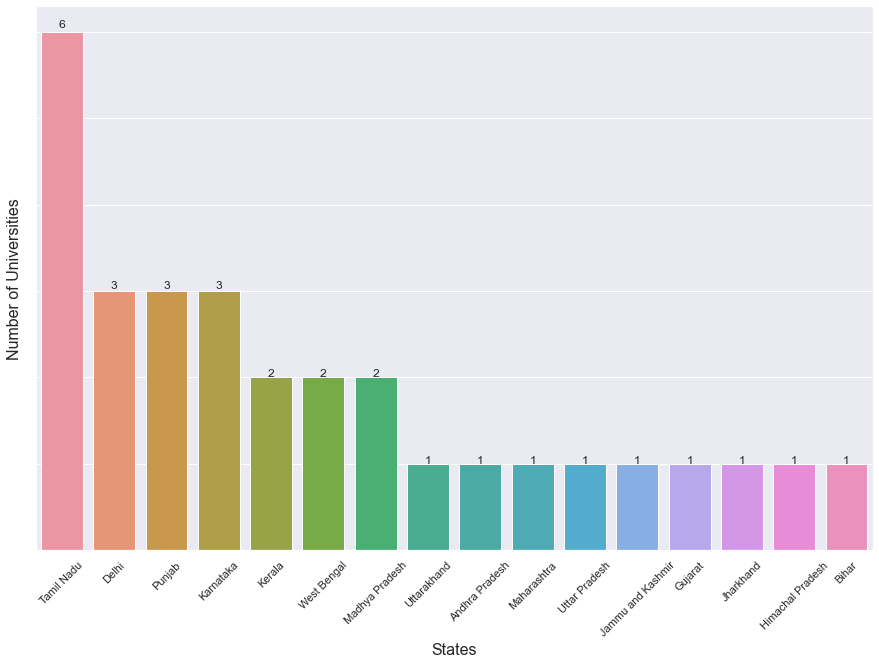

College Ranking


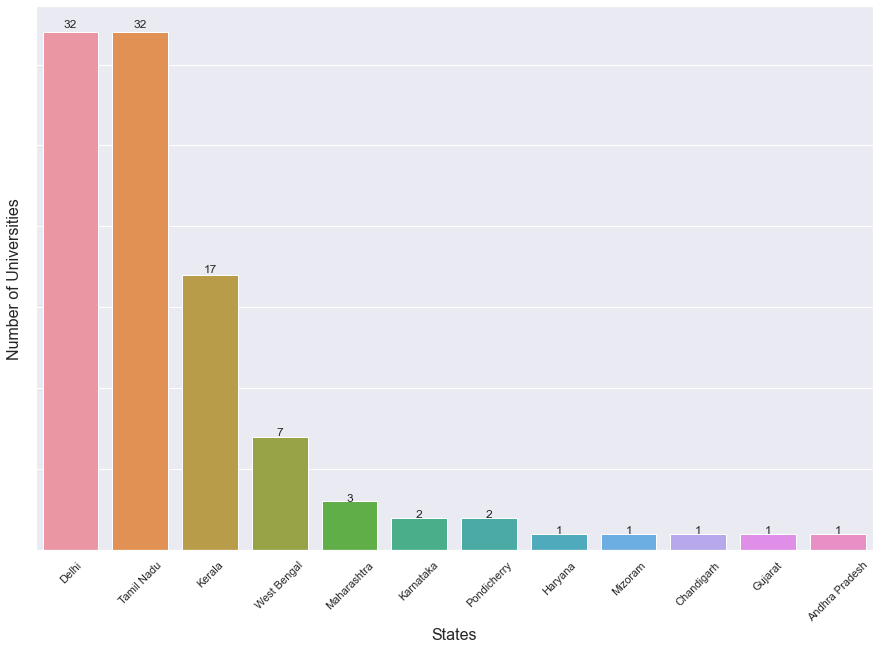

Dental Ranking


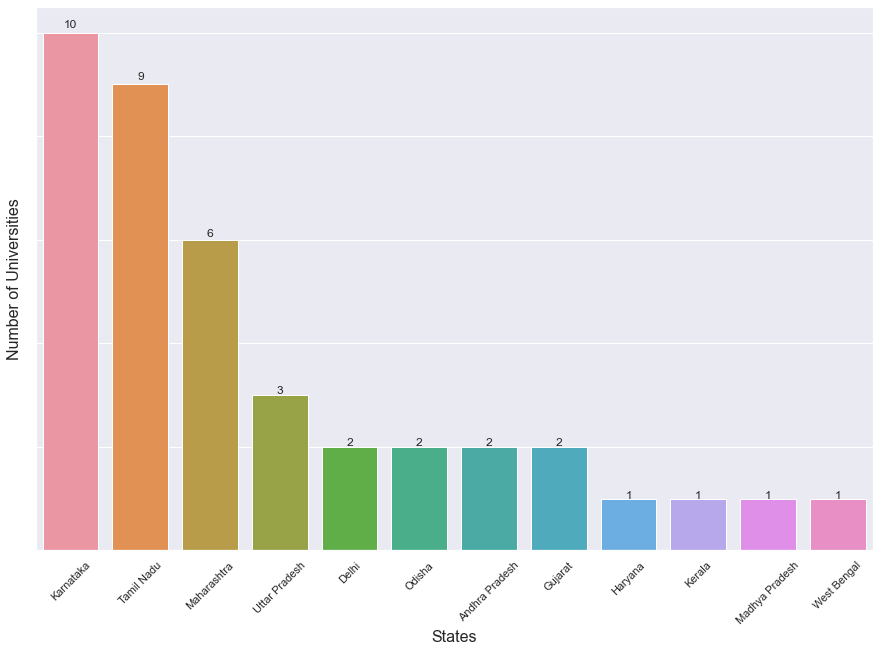

Engineering Ranking


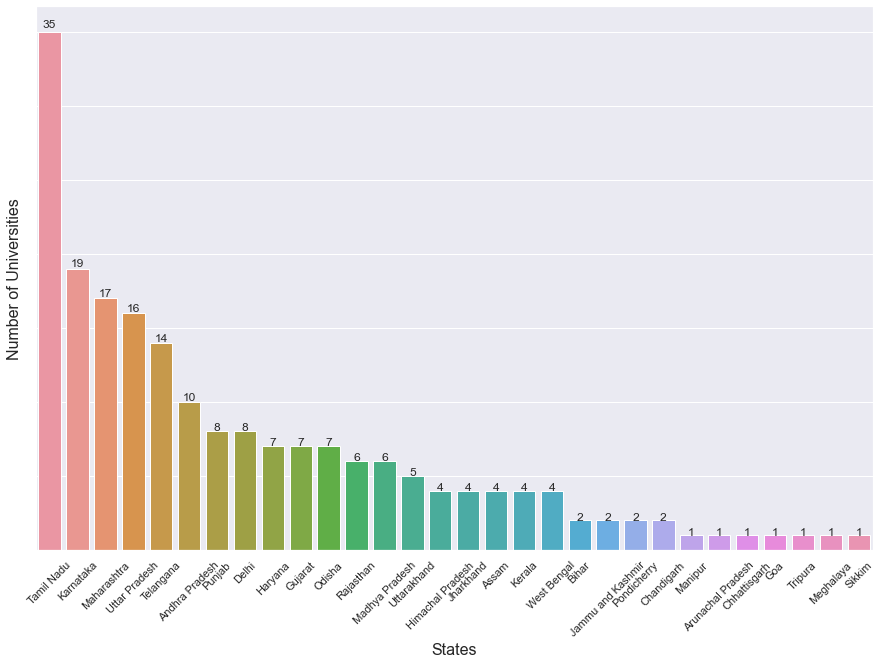

Law Ranking


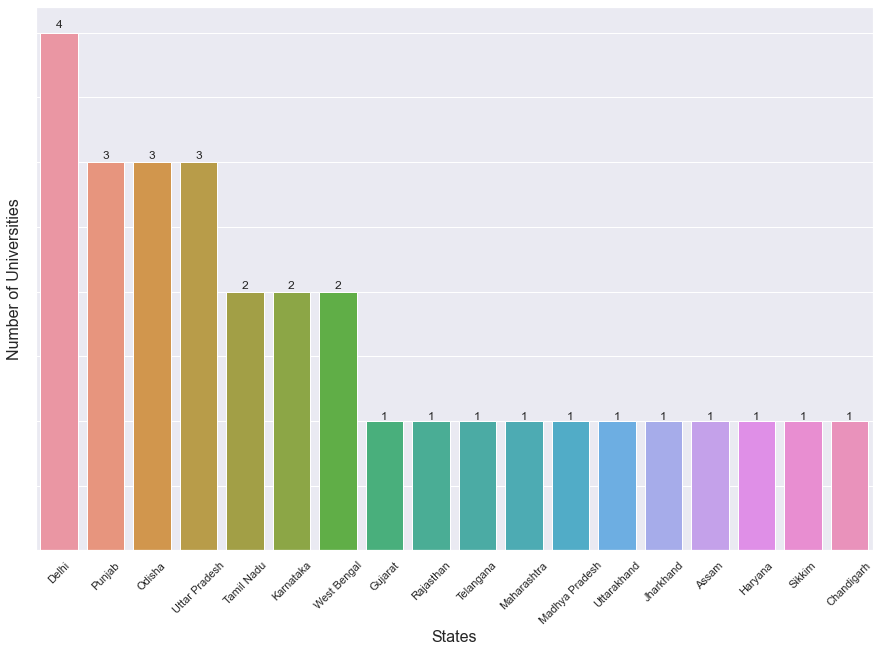

Management Ranking


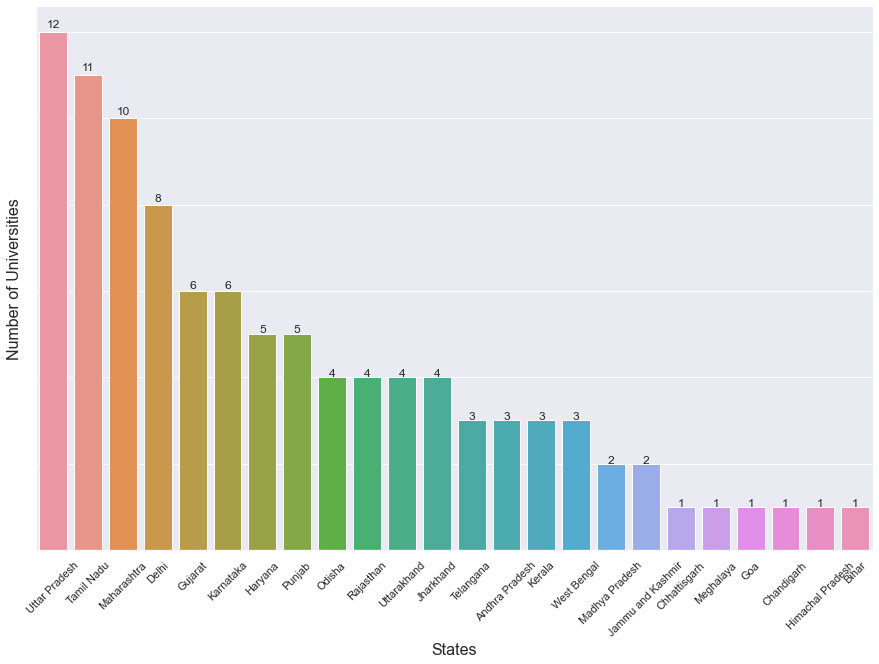

Medical Ranking


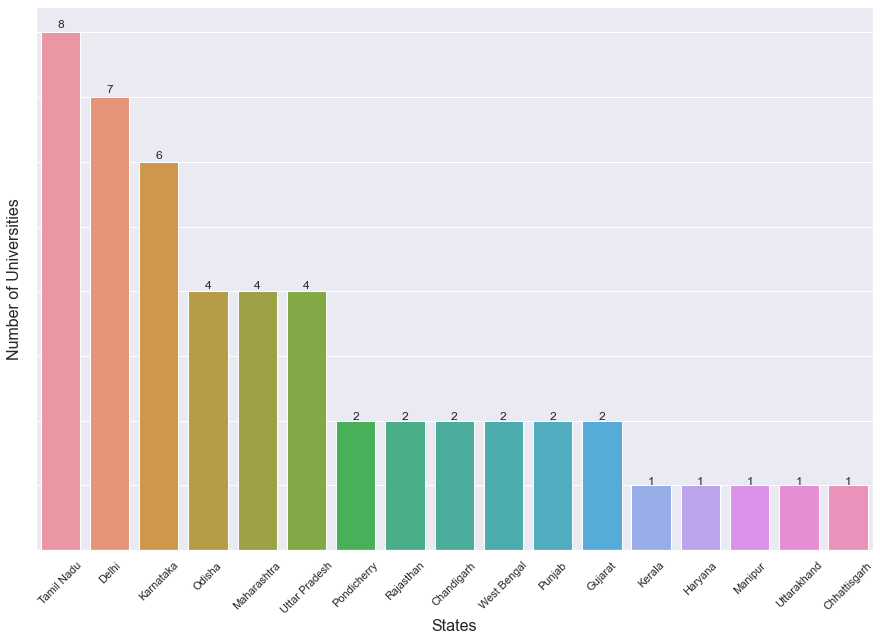

Overall Ranking


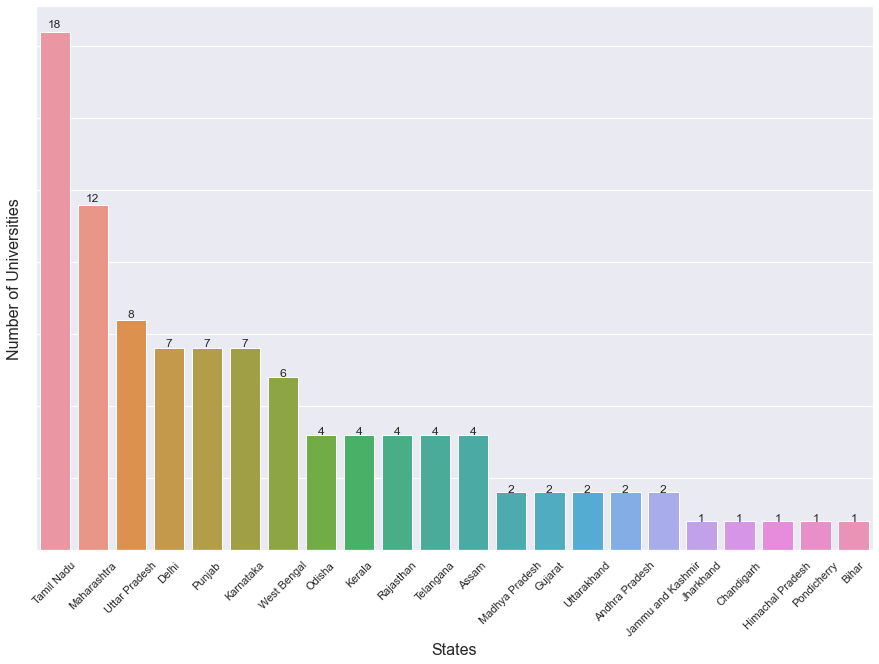

Pharmacy Ranking


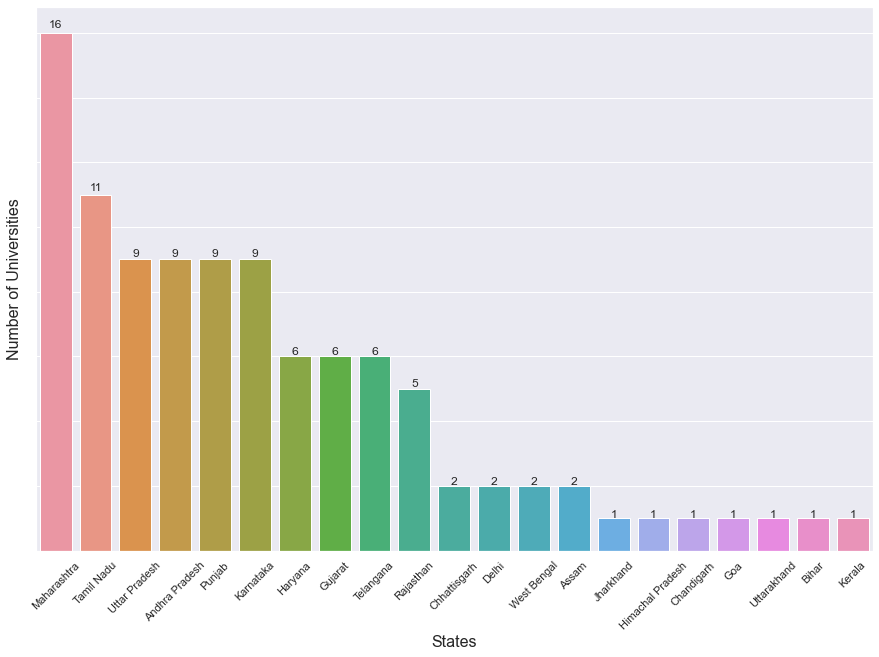

Research Ranking


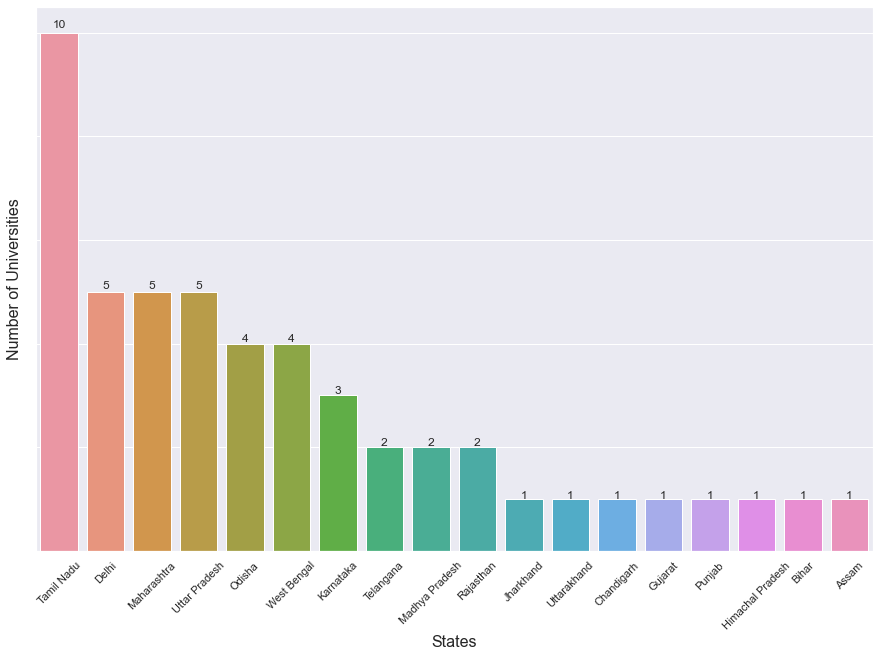

University Ranking


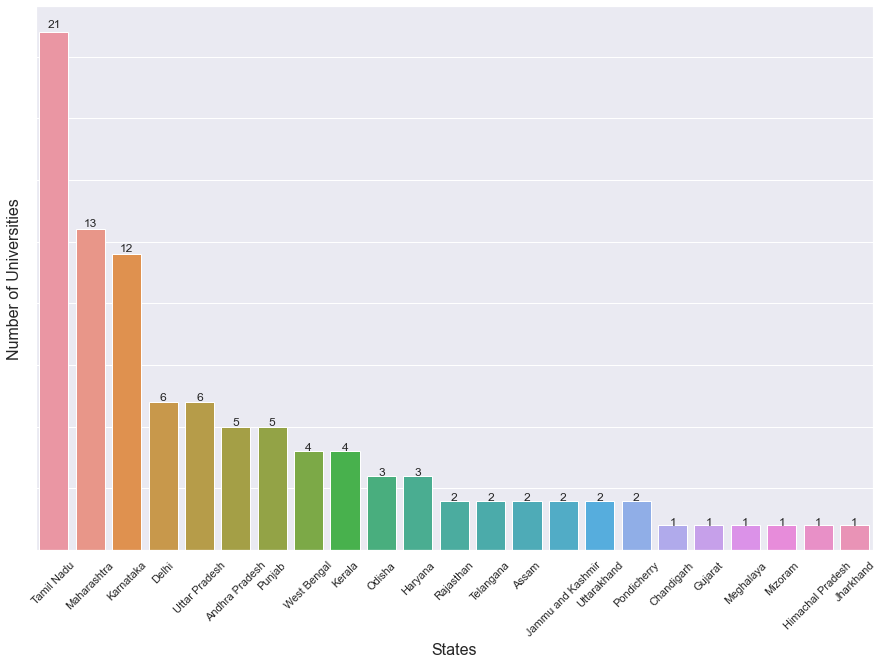

In [ ]:
categories = [[arch_ranking, "Arch Ranking"], [college_ranking,"College Ranking"], [dental_ranking, "Dental Ranking"], [engineering_ranking, "Engineering Ranking"], [law_ranking, "Law Ranking"], [management_ranking, "Management Ranking"], [medical_ranking,"Medical Ranking"], [overall_ranking, "Overall Ranking"], [pharmacy_ranking, "Pharmacy Ranking"] ,[research_ranking, "Research Ranking"],[university_ranking, "University Ranking"]]
for category,categoryname in categories:
    print(categoryname)
    plot_data(category)

In [ ]:
def statewise_data(category,categoryname):
    print(categoryname)
    count = pd.DataFrame(category['State'].value_counts())
    count.reset_index(inplace=True)
#     print(count.index)
    count.columns= ["State", "Number of Universities"]
    count.to_csv("nirf_statewise_data/" + categoryname + "_statewise.csv", index=False)
    pie, ax = plt.subplots(figsize=[10,10])
    labels = count["State"]
    plt.pie(x=count["Number of Universities"], autopct="%.1f%%", explode=[0.075]*len(labels), labels=labels, pctdistance=0.75,textprops={'fontsize': 14},startangle=90,wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True}, rotatelabels=True)
    plt.show()

Arch Ranking


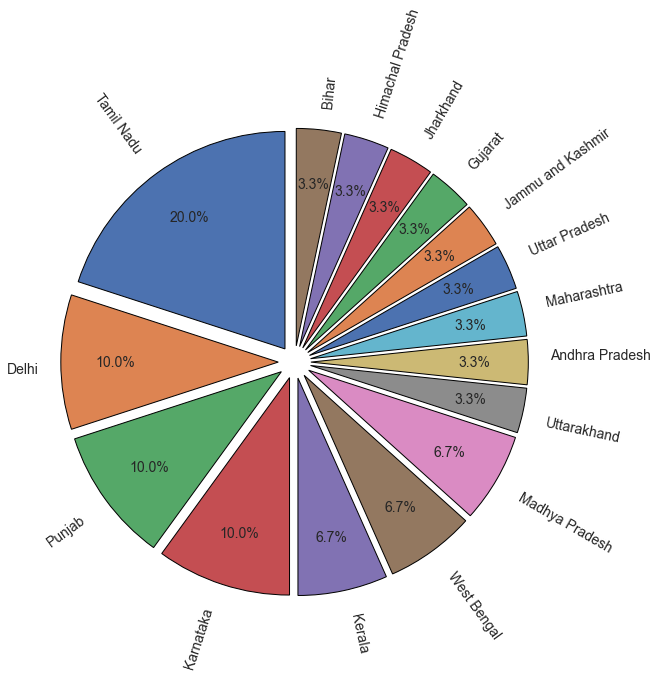

College Ranking


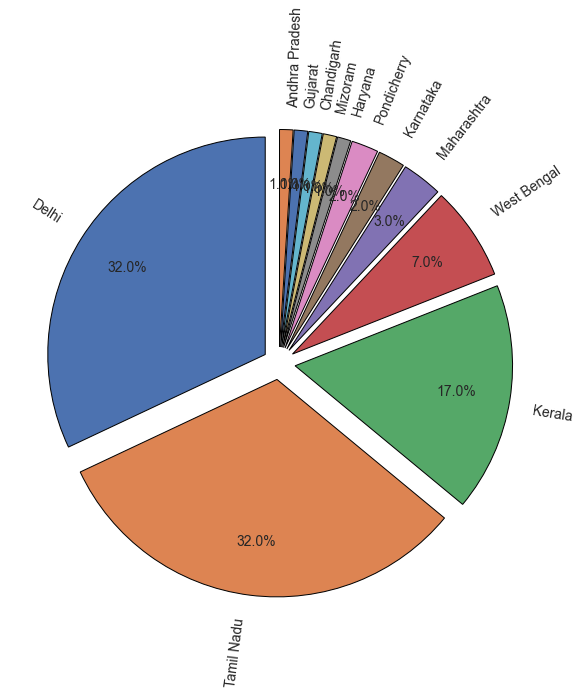

Dental Ranking


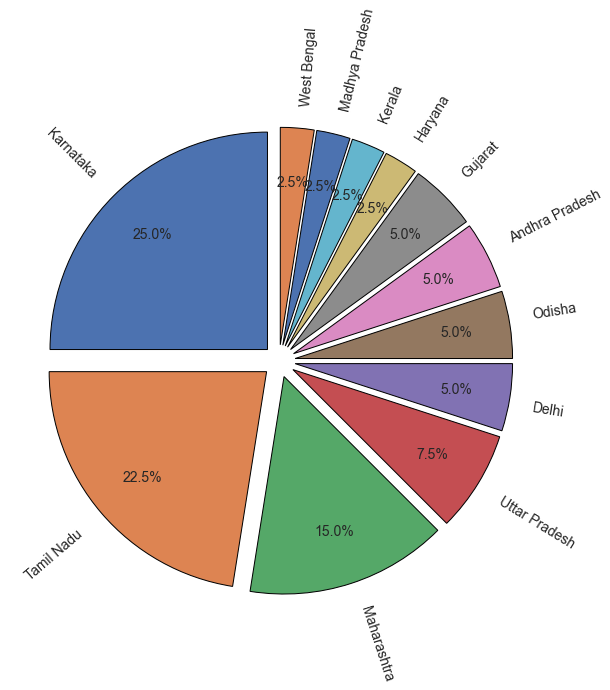

Engineering Ranking


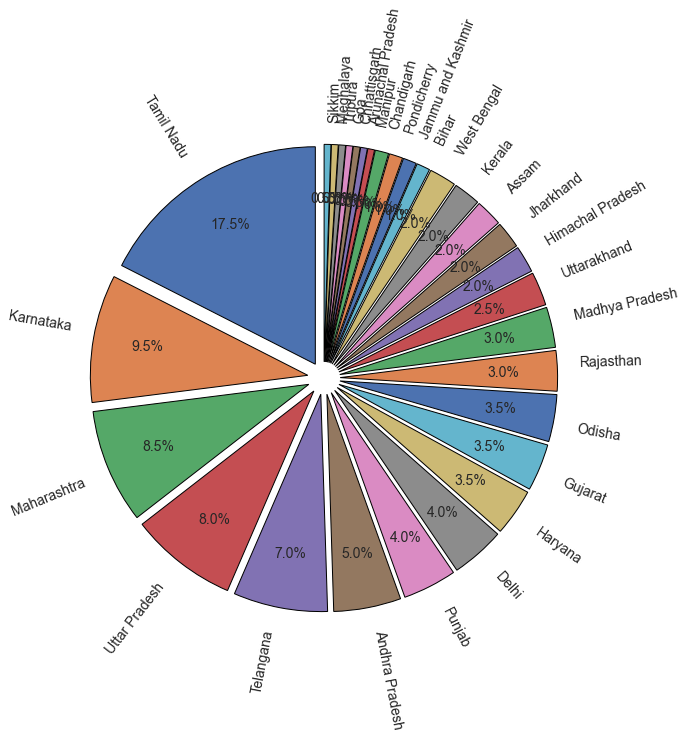

Law Ranking


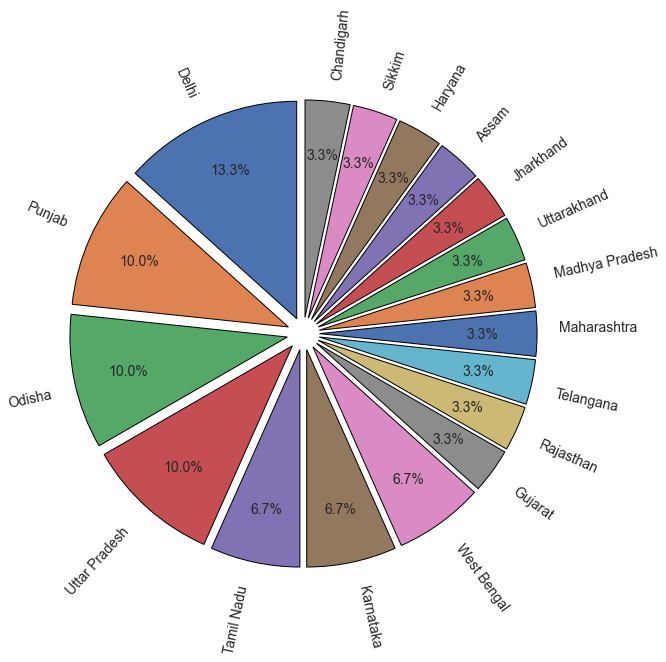

Management Ranking


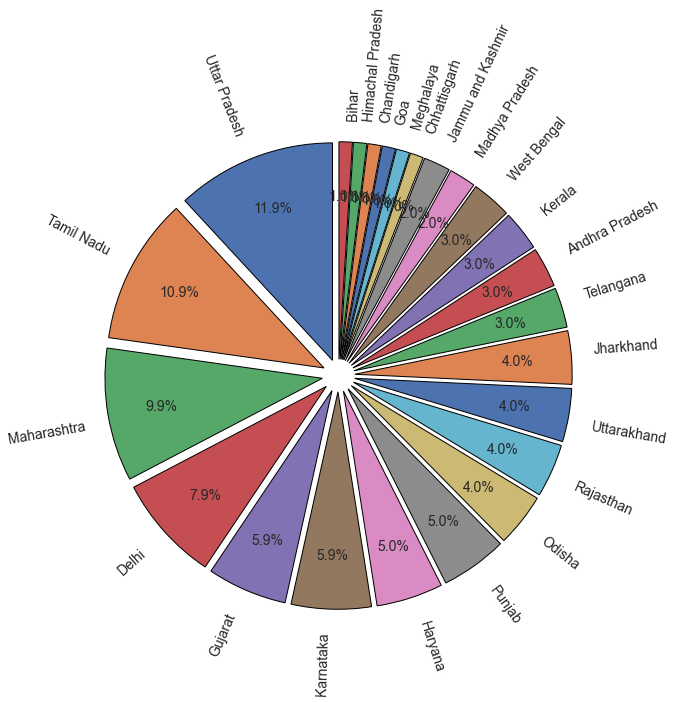

Medical Ranking


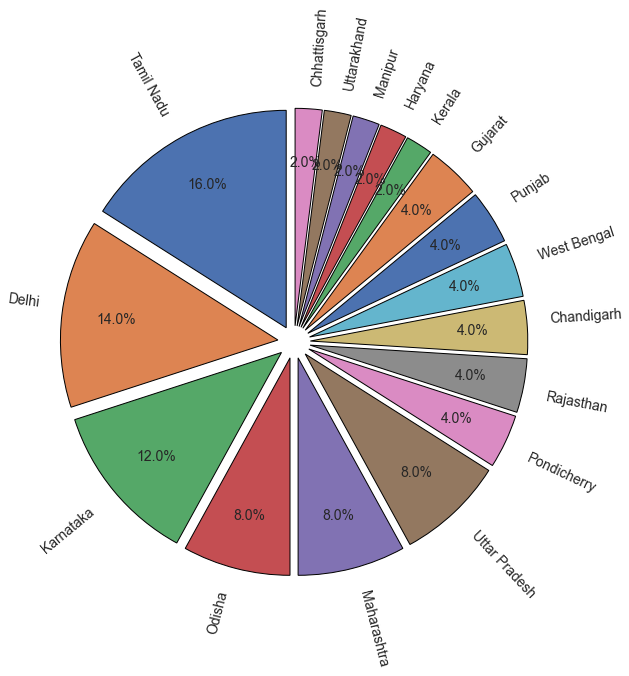

Overall Ranking


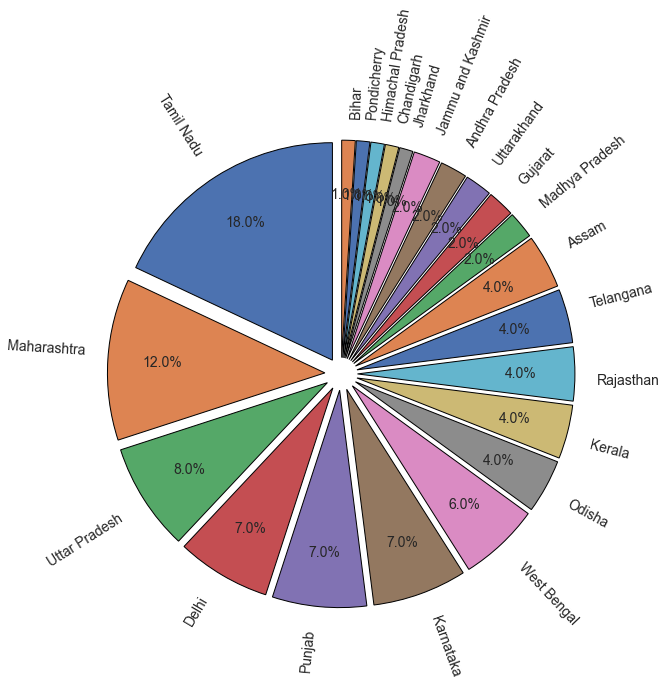

Pharmacy Ranking


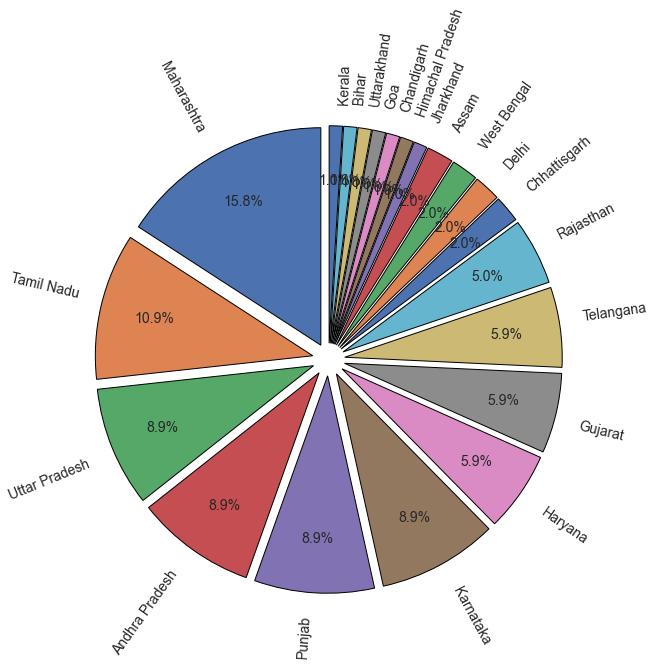

Research Ranking


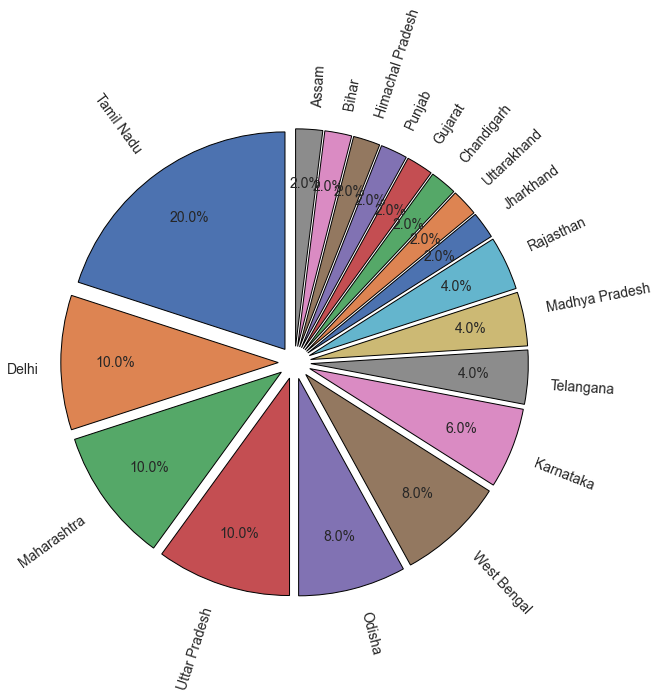

University Ranking


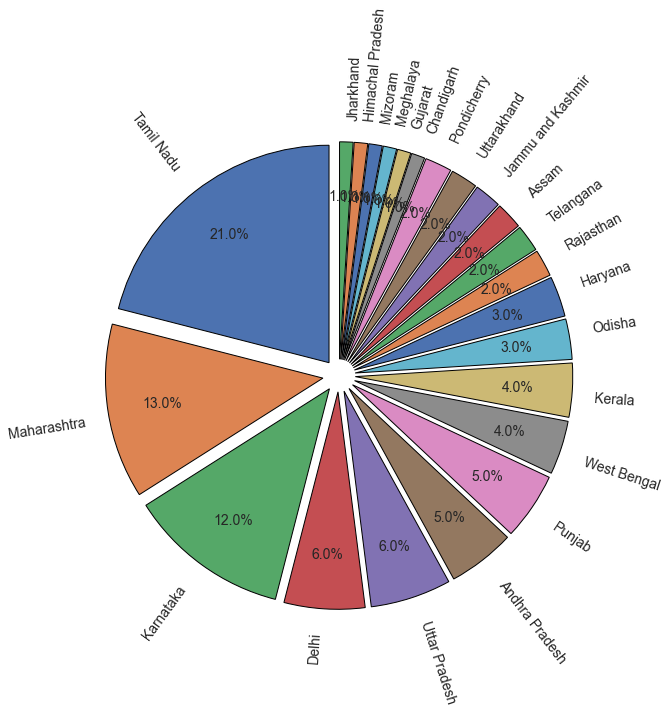

In [ ]:
for category,categoryname in categories:
    statewise_data(category,categoryname)